# Solution: A simple model for vaccination

**Modelling a disease where $\beta$ = 0.4 days$^{-1}$, $\gamma$ = 0.1 days $^{-1}$ and the vaccine coverage *p* = 0.5**

Warning message:
"package 'deSolve' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


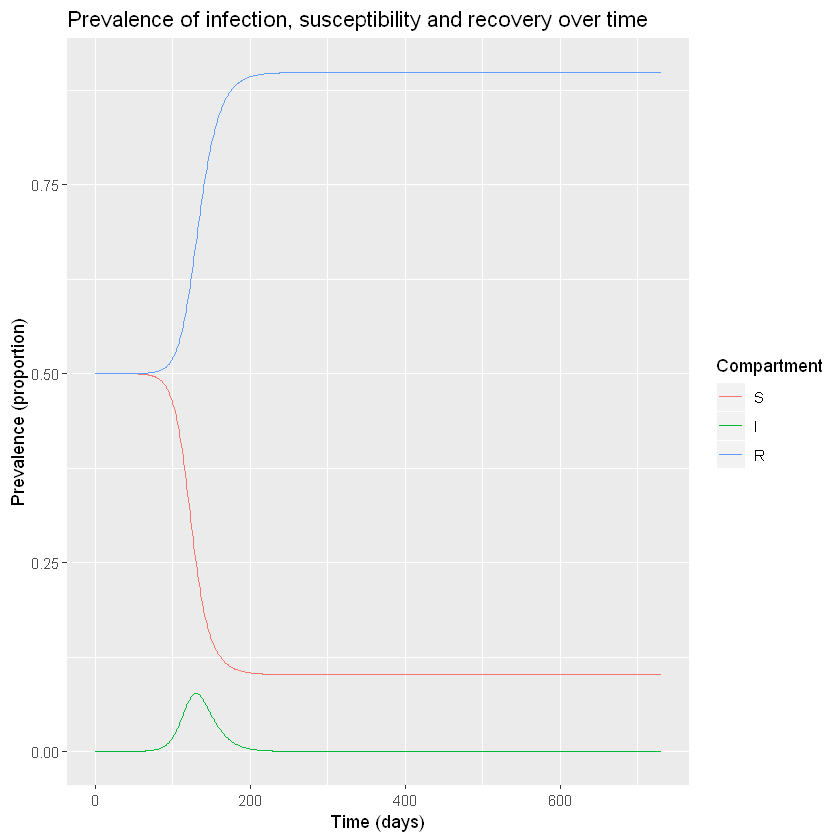

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vaccine coverage
p <- 0.5

# Total population size
N <- 10^6

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = (1-p)*(N-1),   # a proportion 1-p of the total population is susceptible
                          I = 1,             # the epidemic starts with a single infected person
                          R = p*(N-1))       # a proportion p of the total population is vaccinated/immune

# Vector storing the parameters describing the transition rates in units of days^-1
parameters <- c(beta = 0.4,      # the infection rate, which acts on susceptibles
                gamma = 0.1)     # the rate of recovery, which acts on those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 730, by = 1)   # from 0 to 730 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to look for variable names within the state and parameters objects    
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+I+R
      
    # Defining lambda as a function of beta and I:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S               # people move out of (-) the S compartment at a rate lambda (force of infection)
      dI <- lambda * S - gamma * I    # people move into (+) the I compartment from S at a rate lambda, 
                                      # and move out of (-) the I compartment at a rate gamma (recovery)
      dR <- gamma * I                 # people move into (+) the R compartment from I at a rate gamma
      
    # Return the number of people in the S, I and R compartments at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the prevalence proportion
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Prevalence (proportion)") +                                      # add label for y axis
  labs(colour = "Compartment",                                           # add legend title
       title = "Prevalence of infection, susceptibility and recovery over time")   # add plot title    

**Increasing the vaccine coverage to 75%**

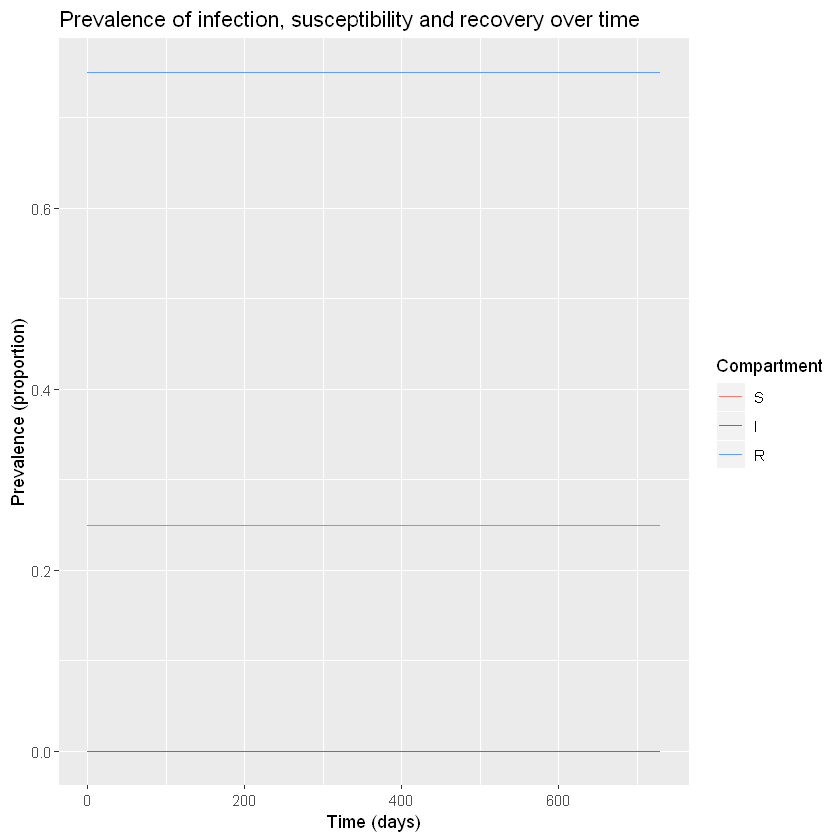

In [2]:
# MODEL INPUTS:

# Vaccine coverage
p <- 0.75

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = (1-p)*(N-1),   # a proportion 1-p of the total population is susceptible
                          I = 1,             # the epidemic starts with a single infected person
                          R = p*(N-1))       # a proportion p of the total population is vaccinated/immune

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the prevalence proportion
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Prevalence (proportion)") +                                      # add label for y axis
  labs(colour = "Compartment",                                           # add legend title
       title = "Prevalence of infection, susceptibility and recovery over time")   # add plot title    

### Does everyone in the population need to be vaccinated in order to prevent an epidemic? What do you observe if you model the infection dynamics with different values for *p*? Can you explain why?

No, not everyone in the population needs to be vaccinated in order to prevent an epidemic. In this scenario, if *p* equals 0.75 or higher, no epidemic occurs - 75% is the critical vaccination/herd immunity threshold. Remember, as you heard in week 2, herd immunity describes the phenomenon in which there is sufficient immunity in a population to interrupt transmission. Because of this, not everyone needs to be vaccinated to prevent an outbreak.


### What proportion of the population needs to be vaccinated in order to prevent an epidemic if $\beta$ = 0.4 and $\gamma$ = 0.2 days$^{-1}$? What if $\beta$ = 0.6 and $\gamma$ = 0.1 days$^{-1}$?

If $\beta$ = 0.4 and $\gamma$ = 0.2 days$^{-1}$, the herd immunity threshold is 50%. If $\beta$ = 0.6 and $\gamma$ = 0.1 days$^{-1}$, the required vaccination coverage is around 83%.

### Remember that vaccination changes the effective reproduction number, by reducing the number of people who are susceptible. Based on your answers to the previous questions, can you use the formula for the effective reproduction number R<sub>eff</sub> to derive a formula for calculating the critical vaccination threshold?

In mathematical modelling terms, herd immunity is just the same as saying that R<sub>eff</sub> < 1. We can derive the herd immunity threshold by solving the formula for R<sub>eff</sub> for *p* when R<sub>eff</sub> = 1:

\begin{align}
R_{eff} & = R_{0} \frac{S}{N} \\
R_{eff} & = R_{0} (1-p) \\
p = 1-\frac{1}{R_{0}}
\end{align}

Remember, we can calculate R<sub>0</sub> by dividing $\beta$ by $\gamma$.